<a href="https://colab.research.google.com/github/Elma-dev/Deep_Learning_Specialization/blob/main/Deep_Learning_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time

# Vectorization

In [2]:
#Sum Of Column Without for loop
A=np.array([[65,0,4.4,68]
         ,[1.2,104,52,8]
         ,[1.8,135,99,0.9]])

ones=np.ones((1,3))
np.dot(ones,A)

array([[ 68. , 239. , 155.4,  76.9]])

In [3]:
#Vectorization Vs forLoop
A=np.random.rand(10000)
B=np.random.rand(10000)

#Vectorization
tic=time.time()
c=np.dot(A,B)
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

#For Loop
c=0
tic=time.time()
for i in range(10000):
  c+=A[i]*B[i]
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

result=2490.9727078056144 the operation take: 0.3638267517089844ms
result=2490.97270780561 the operation take: 12.353658676147461ms


# Trics

In [4]:
#Row Vector / Column Vector / Rank 1 array

#Rank 1 array
print(f"rank_1_array:\n{np.random.randn(5)}") #-> don't use it
print(f"column_vector:\n{np.random.randn(1,5)}")
print(f"row_vector:\n{np.random.randn(5,1)}")

rank_1_array:
[ 1.57616845  1.66386509 -0.95576009  1.05843147  0.02352394]
column_vector:
[[-0.60440295 -0.01462151 -2.3902544   1.05783492 -0.74696992]]
row_vector:
[[ 0.44905297]
 [ 1.33335196]
 [-0.14648774]
 [ 0.10846736]
 [-0.23346869]]


In [5]:
a=np.array([[2,1],[1,3]])
np.dot(a,a)

array([[ 5,  5],
       [ 5, 10]])

In [6]:
a=np.random.randn(12288,150)
b=np.random.randn(150,45)

np.dot(a,b).shape
a.sum()

249.40261845499705

In [7]:
a=np.random.randn(2,3)
b=np.random.randn(2,1)
a+b

array([[1.93973714, 0.42668552, 2.36734779],
       [0.62475678, 0.98298616, 1.22136655]])

#<center>**Logistic_Regression_with_a_Neural_Network_mindset**</center>

### **Load Data**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scipy
import PIL

from PIL import Image
from scipy import ndimage

In [17]:
def load_dataset():
  train_dataset=h5py.File("train_catvnoncat.h5")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])#train features
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])

  test_dataset=h5py.File("test_catvnoncat.h5")
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])#test features
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])

  classes=np.array(test_dataset["list_classes"][:])#the list of classes

  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))

  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig


In [18]:
#read data
train_set_in,train_set_out,test_set_in,test_set_out=load_dataset()

In [23]:
#show the shapes of each var
print(f"shape train test {train_set_in.shape}") #==> (nbrImg,x,y,depth)
print(f"shape train test {train_set_out.shape}")
print(f"shape train test {test_set_in.shape}")
print(f"shape train test {test_set_out.shape}")

shape train test (209, 64, 64, 3)
shape train test (1, 209)
shape train test (50, 64, 64, 3)
shape train test (1, 50)


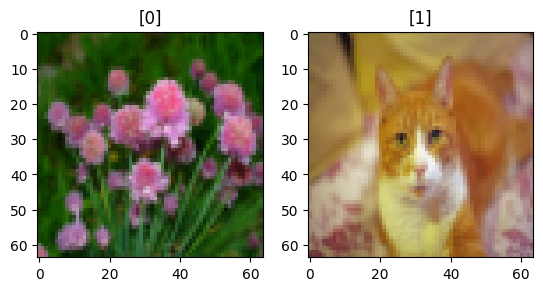

In [52]:
f,ax=plt.subplots(1,2)
ax[0].imshow(train_set_in[21])
ax[0].title.set_text(f"{train_set_out[:,21]}")
ax[1].imshow(train_set_in[24])
ax[1].title.set_text(f"{train_set_out[:,24]}")
plt.show()

## **Image Flaten**
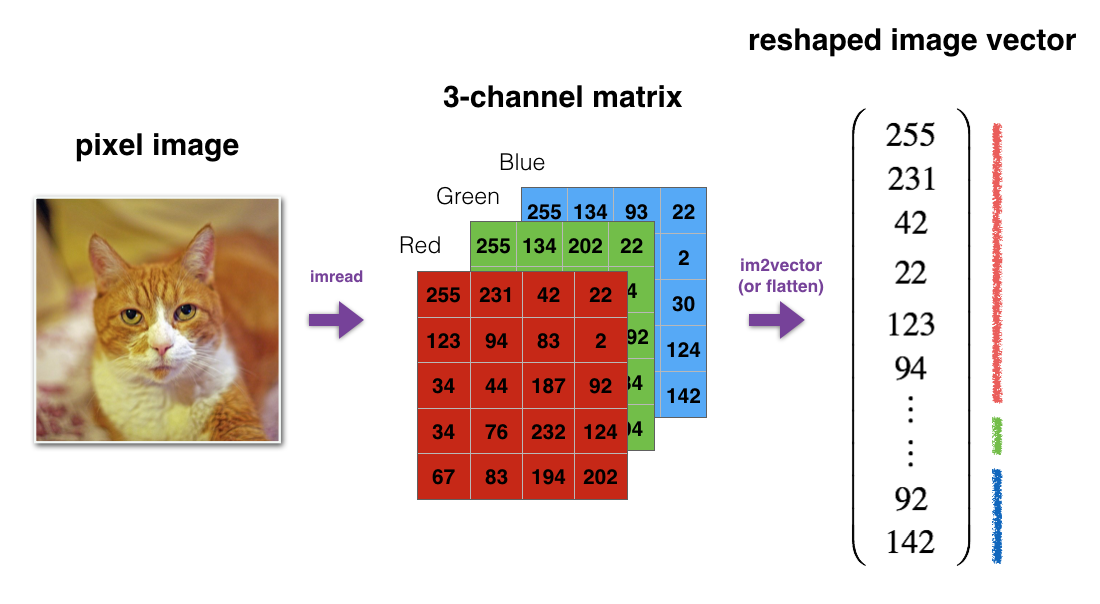

In [59]:
#Reshape the training and test image --> flaten each image
train_img=train_set_in.reshape(train_set_in.shape[0],-1).T #==>(nbrImge,flatenEachImage) & transpose to be vect
test_img=test_set_in.reshape(test_set_in.shape[0],-1).T

<center>
<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td>
  </tr>
</table>
</center>

In [60]:
train_img

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

##**"Standardize" the data**

In [61]:
#standarization of image
train_img=train_img/255
test_img=test_img/255

In [62]:
train_img

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

##**General Architecture of the learning algorithm**
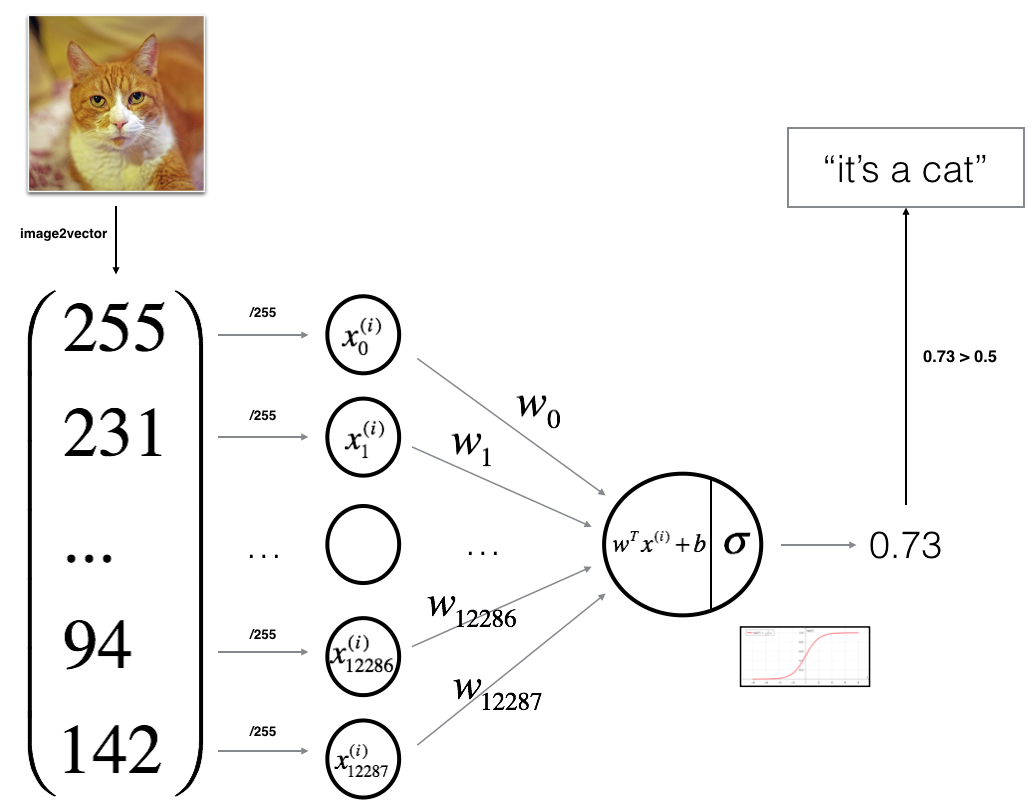

## **Sogmoid Function**
<center>
$sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$
</center>

In [63]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [67]:
#test
print(f"{sigmoid(0)}")
print(f"{sigmoid(np.array([2,3]))}")

0.5
[0.88079708 0.95257413]


##**Propagate**
<center>
$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

* ***Cost Function***

$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
* ***Gradient***
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$
</center>

In [99]:
def propagate(w,b,X,Y):
  #Calculate z
  z=np.dot(w.T,X)+b
  #Calculate A
  A=sigmoid(z)
  #Calcualte Cost Function
  m=X.shape[0]
  J= -np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)))/m
  #Calculate db,dw
  dw=np.dot(X,(A-Y).T)/m
  db=np.sum(A-Y)/m
  return dw,db,J




In [100]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
z=np.dot(w.T,X)+b
#Explanation
print(f"w.T.shape * X.shape = z.shape ==> {w.T.shape , X.shape , z.shape}")
#Test
print(f"Propagate: {propagate(w,b,X,Y)}")

w.T.shape * X.shape = z.shape ==> ((1, 12288), (12288, 209), (1, 209))
Propagate: (array([[0.00080295],
       [0.00107151],
       [0.00083742],
       ...,
       [0.00086311],
       [0.00105667],
       [0.00055195]]), 0.0026448567708333335, 0.01178936854956287)


## **Gradient Descent**

In [109]:
import copy
def gradientDescent(w,b,X,Y,iter=1000,alpha=0.01):
  errors=[]
  w,b=copy.deepcopy(w),copy.deepcopy(b)
  for i in range(iter):
    dw,db,cost=propagate(w,b,X,Y)
    w-=alpha*dw
    b-=alpha*db
    errors.append(cost)
  return {"w":w,"b":b,"errors":errors}


Gradient Descent: 


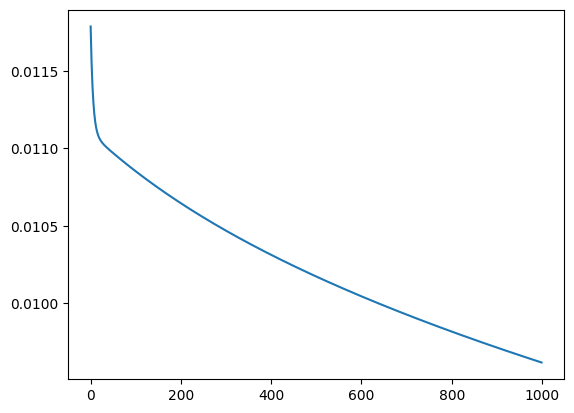

In [113]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
#Test
print(f"Gradient Descent: ")
results=gradientDescent(w,b,X,Y)
plt.plot(range(1000),results["errors"])
plt.show()
